In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objs as go
import plotly
import plotly.graph_objects as go
import datetime
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [52]:
pathfile1= "C:/Users/pavan/JN/Test.csv"
TestData = pd.read_csv("C:/Users/pavan/JN/Test.csv")


In [3]:
TestData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929615 entries, 0 to 929614
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   fecha_dato             929615 non-null  object 
 1   ncodpers               929615 non-null  int64  
 2   ind_empleado           929615 non-null  object 
 3   pais_residencia        929615 non-null  object 
 4   sexo                   929610 non-null  object 
 5   age                    929615 non-null  int64  
 6   fecha_alta             929615 non-null  object 
 7   ind_nuevo              929615 non-null  int64  
 8   antiguedad             929615 non-null  int64  
 9   indrel                 929615 non-null  int64  
 10  ult_fec_cli_1t         1683 non-null    object 
 11  indrel_1mes            929592 non-null  float64
 12  tiprel_1mes            929592 non-null  object 
 13  indresi                929615 non-null  object 
 14  indext                 929615 non-nu

In [49]:
pathfile2="C:/Users/pavan/JN/Train.csv"

TrainData = pd.read_csv("C:/Users/pavan/JN/Train.csv")

In [50]:
TrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta           

In [10]:
TestData.head(10)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
0,2016-06-28,15889,F,ES,V,56,1995-01-16,0,256,1,...,N,N,KAT,N,1,28.0,MADRID,1,326124.90,01 - TOP
1,2016-06-28,1170544,N,ES,H,36,2013-08-28,0,34,1,...,N,NaN,KAT,N,1,3.0,ALICANTE,0,NA,02 - PARTICULARES
2,2016-06-28,1170545,N,ES,V,22,2013-08-28,0,34,1,...,N,NaN,KHE,N,1,15.0,"CORUÑA, A",1,NA,03 - UNIVERSITARIO
3,2016-06-28,1170547,N,ES,H,22,2013-08-28,0,34,1,...,N,NaN,KHE,N,1,8.0,BARCELONA,0,148402.98,03 - UNIVERSITARIO
4,2016-06-28,1170548,N,ES,H,22,2013-08-28,0,34,1,...,N,NaN,KHE,N,1,7.0,"BALEARS, ILLES",0,106885.80,03 - UNIVERSITARIO
5,2016-06-28,1170550,N,ES,V,22,2013-08-28,0,34,1,...,N,NaN,KHE,N,1,8.0,BARCELONA,0,NA,03 - UNIVERSITARIO
6,2016-06-28,1170552,N,ES,H,51,2013-08-28,0,34,1,...,N,NaN,KFC,N,1,35.0,"PALMAS, LAS",1,96395.88,02 - PARTICULARES
7,2016-06-28,1170553,N,ES,H,22,2013-08-28,0,34,1,...,N,NaN,KHE,N,1,45.0,TOLEDO,0,NA,03 - UNIVERSITARIO
8,2016-06-28,1170555,N,ES,V,22,2013-08-28,0,34,1,...,N,NaN,KHE,N,1,28.0,MADRID,0,NA,03 - UNIVERSITARIO
9,2016-06-28,1170557,N,ES,H,22,2013-08-28,0,34,1,...,N,NaN,KHE,N,1,15.0,"CORUÑA, A",1,68322.72,03 - UNIVERSITARIO


In [11]:
TrainData.head(10)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
5,2015-01-28,1050615,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
6,2015-01-28,1050616,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
7,2015-01-28,1050617,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
8,2015-01-28,1050619,N,ES,H,24,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
9,2015-01-28,1050620,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [15]:
print('Number of rows in test set', TestData.shape[0])
print('Number of rows in train set', TrainData.shape[0])

print('Number of Unique Customer in test set:', len(set(TestData.ncodpers.unique())))
print('Number of Unique Customer in train set:', len(set(TrainData.ncodpers.unique())))

Number of rows in test set 929615
Number of rows in train set 13647309
Number of Unique Customer in test set: 929615
Number of Unique Customer in train set: 956645


### Selecting sample dataset of 5 million rows

In [56]:
del TrainData
del TestData

In [5]:
CustomerData = pd.read_csv('C:/Users/pavan/JN/Train.csv',
                              dtype={"sexo":str, "ind_nuevo":str, 
                                      "ult_fec_cli_1t":str, 
                                      "indext":str}, nrows=5e6)

In [5]:
n = 500000
unique_ids = pd.Series(CustomerData["ncodpers"].unique())
unique_id = unique_ids.sample(n)
CustomerData = CustomerData[CustomerData.ncodpers.isin(unique_id)]
CustomerData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2985114 entries, 2 to 4999997
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              object 
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta             

### Missing Values in the columns

In [6]:
CustomerData.isnull().sum()

fecha_dato                     0
ncodpers                       0
ind_empleado               16154
pais_residencia            16154
sexo                       16162
age                            0
fecha_alta                 16154
ind_nuevo                  16154
antiguedad                     0
indrel                     16154
ult_fec_cli_1t           2981210
indrel_1mes                25916
tiprel_1mes                25916
indresi                    16154
indext                     16154
conyuemp                 2984710
canal_entrada              28005
indfall                    16154
tipodom                    16154
cod_prov                   33180
nomprov                    33180
ind_actividad_cliente      16154
renta                     519541
segmento                   28225
ind_ahor_fin_ult1              0
ind_aval_fin_ult1              0
ind_cco_fin_ult1               0
ind_cder_fin_ult1              0
ind_cno_fin_ult1               0
ind_ctju_fin_ult1              0
ind_ctma_f

### ind_empleado","ind_nuevo","indresi" have same number of missing values. Checking if the same rows?

In [7]:
CustomerData.loc[CustomerData["pais_residencia"].isnull(),["ind_empleado","ind_nuevo","indresi"]].head()

,ind_empleado,ind_nuevo,indresi
261,NaN,NaN,NaN
1029,NaN,NaN,NaN
1063,NaN,NaN,NaN
1154,NaN,NaN,NaN
1779,NaN,NaN,NaN


### Deleting the columns "ult_fec_cli_1t" and "conyuemp" which has highest missing values

In [8]:
CustomerData = CustomerData.drop(["ult_fec_cli_1t", "conyuemp"], axis=1) 

In [9]:
CustomerData.ncodpers.count()

2985114

### Data type updation

In [10]:
# Converting into numbers
CustomerData.indrel_1mes = pd.to_numeric(CustomerData.indrel_1mes, errors = 'coerce')
CustomerData.age = pd.to_numeric(CustomerData.age, errors = 'coerce')
CustomerData.antiguedad = pd.to_numeric(CustomerData.antiguedad, errors = 'coerce')


In [95]:
StringData = CustomerData.select_dtypes(include=["object"])
del StringData

### Updating Missing Values

In [42]:
# Checking the active months of customers with data missing 
months_active = CustomerData.loc[CustomerData["ind_nuevo"].isnull(),:].groupby("ncodpers", sort=False).size()
months_active.max()

6

In [44]:
# As the customer is new lets update with 1
CustomerData.loc[CustomerData["ind_nuevo"].isnull(),"ind_nuevo"] = 1

In [48]:
# Assuming same people 
CustomerData.loc[CustomerData.antiguedad.isnull(),"antiguedad"] = CustomerData.antiguedad.min()
CustomerData.loc[CustomerData.antiguedad <0, "antiguedad"]      = 0

In [60]:
# As 1 (First/Primary), 99 (Primary customer during the month but not at the end of the month), lets assume as 1
CustomerData.loc[CustomerData.indrel.isnull(),"indrel"] = 1

In [50]:
# replacing date of joining with Median
dates=CustomerData.loc[:,"fecha_alta"].sort_values().reset_index()
median_date = int(np.median(dates.index.values))
CustomerData.loc[CustomerData.fecha_alta.isnull(),"fecha_alta"] = dates.loc[median_date,"fecha_alta"]
CustomerData["fecha_alta"].describe()

count        2985114
unique          6356
top       2010-11-02
freq           16477
Name: fecha_alta, dtype: object

In [11]:
# Replacing AGE values with Mean
CustomerData.loc[CustomerData.age < 18,"age"]  = CustomerData.loc[(CustomerData.age >= 18) & (CustomerData.age <= 30),"age"].mean(skipna=True)
CustomerData.loc[CustomerData.age > 100,"age"] = CustomerData.loc[(CustomerData.age >= 30) & (CustomerData.age <= 100),"age"].mean(skipna=True)
CustomerData["age"].fillna(CustomerData["age"].mean(),inplace=True)
CustomerData["age"] = CustomerData["age"].astype(int)

In [55]:
# Replacing with Median
CustomerData.loc[CustomerData.ind_actividad_cliente.isnull(),"ind_actividad_cliente"] = \
CustomerData["ind_actividad_cliente"].median()

In [12]:
#missing values of "Nomprov" as Unknown
CustomerData.nomprov.unique()

array(['CIUDAD REAL', 'ZARAGOZA', 'LEON', 'GIPUZKOA', 'CACERES', 'GIRONA',
       'ZAMORA', 'SALAMANCA', 'HUESCA', 'NAVARRA', 'TOLEDO', 'SEGOVIA',
       'LUGO', 'LERIDA', 'BARCELONA', 'MADRID', 'ALICANTE', 'SORIA',
       'CANTABRIA', 'MALAGA', 'BALEARS, ILLES', 'VALLADOLID', 'VALENCIA',
       'CORUÑA, A', 'OURENSE', 'JAEN', 'PONTEVEDRA', 'TERUEL', 'BIZKAIA',
       'CASTELLON', 'ALBACETE', 'BADAJOZ', 'MURCIA', 'SEVILLA', 'AVILA',
       nan, 'BURGOS', 'PALENCIA', 'CUENCA', 'RIOJA, LA', 'CORDOBA',
       'CADIZ', 'HUELVA', 'ASTURIAS', 'SANTA CRUZ DE TENERIFE', 'GRANADA',
       'ALMERIA', 'GUADALAJARA', 'PALMAS, LAS', 'TARRAGONA', 'ALAVA',
       'CEUTA', 'MELILLA'], dtype=object)

In [13]:
CustomerData.loc[CustomerData.nomprov=="CORU\xc3\x91A, A","nomprov"] = "CORUNA, A"
CustomerData.loc[CustomerData.nomprov.isnull(),"nomprov"] = "UNKNOWN"

In [14]:
#Replacing renta with median
incomes = CustomerData.loc[CustomerData.renta.notnull(),:].groupby("nomprov").agg({"renta":np.median})
incomes.nomprov = incomes.astype("category",[i for i in CustomerData.nomprov.unique()],False)
incomes.head()

,renta
nomprov,
ALBACETE,78068.64
ALICANTE,67818.96
ALMERIA,73658.19
ASTURIAS,87897.06
AVILA,67608.57


In [59]:
unique_values = np.sort(CustomerData.renta.unique())
CustomerData.loc[CustomerData.renta.isnull(), 'renta'] = CustomerData.renta.dropna().median()
print("Median Income:", int(CustomerData.renta.dropna().median()))

Median Income: 102278


In [40]:
CustomerData.loc[CustomerData.ind_nomina_ult1.isnull(), "ind_nomina_ult1"] = 0
CustomerData.loc[CustomerData.ind_nom_pens_ult1.isnull(), "ind_nom_pens_ult1"] = 0

In [56]:
CustomerData.loc[CustomerData.indfall.isnull(),"indfall"] = "N"
CustomerData.loc[CustomerData.tiprel_1mes.isnull(),"tiprel_1mes"] = "A"
CustomerData.tiprel_1mes = CustomerData.tiprel_1mes.astype("category")

In [72]:
map_dict = { 1.0  : "1",
            "1.0" : "1",
            "1"   : "1",
            "3.0" : "3",
            "P"   : "P",
            3.0   : "3",
            2.0   : "2",
            "3"   : "3",
            "2.0" : "2",
            "4.0" : "4",
            "4"   : "4",
            "2"   : "2"}

In [73]:
CustomerData.indrel_1mes.fillna("P",inplace=True)
CustomerData.indrel_1mes = CustomerData.indrel_1mes.apply(lambda x: map_dict.get(x,x))
CustomerData.indrel_1mes = CustomerData.indrel_1mes.astype("category")

In [75]:
unknown_cols = [col for col in missing_columns if col not in ["indfall","tiprel_1mes","indrel_1mes"]]
for col in unknown_cols:
    CustomerData.loc[CustomerData[col].isnull(),col] = "UNKNOWN"

In [17]:
CustomerData['ind_empleado'].value_counts()

N    2966901
B        810
F        652
A        597
Name: ind_empleado, dtype: int64

In [18]:
# Updating missing value with highest recurring value 
CustomerData.loc[CustomerData.ind_empleado.isnull(), "ind_empleado"] = "N"

In [83]:
# Considering missing values as normal individuals
CustomerData.loc[CustomerData.segmento.isnull(), "segmento"] = "02"

In [81]:
# Removing the columns 
CustomerData.drop(["tipodom","cod_prov"],axis=1,inplace=True)

In [96]:
CustomerData.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado             False
pais_residencia          False
sexo                     False
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
indrel_1mes              False
tiprel_1mes              False
indresi                  False
indext                   False
canal_entrada            False
indfall                  False
nomprov                  False
ind_actividad_cliente    False
renta                    False
segmento                 False
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp_fin_ult1        False
ind_deco_fin_ult1        False
ind_deme_fin_ult1        False
ind_dela_fin_ult1        False
ind_ecue

### Now Data is free from missing vales(NAN)

In [89]:
Target = CustomerData[CustomerData.columns[22:49]].sum(axis=0)
print(Target)

ind_cco_fin_ult1     2196054.0
ind_cder_fin_ult1       1425.0
ind_cno_fin_ult1      269732.0
ind_ctju_fin_ult1      35236.0
ind_ctma_fin_ult1      35146.0
ind_ctop_fin_ult1     460370.0
ind_ctpp_fin_ult1     161486.0
ind_deco_fin_ult1       8548.0
ind_deme_fin_ult1       6978.0
ind_dela_fin_ult1     157277.0
ind_ecue_fin_ult1     278142.0
ind_fond_fin_ult1      64900.0
ind_hip_fin_ult1       21558.0
ind_plan_fin_ult1      31812.0
ind_pres_fin_ult1      10401.0
ind_reca_fin_ult1     178372.0
ind_tjcr_fin_ult1     157326.0
ind_valo_fin_ult1      87065.0
ind_viv_fin_ult1       14085.0
ind_nomina_ult1       185861.0
ind_nom_pens_ult1     200645.0
ind_recibo_ult1       431565.0
dtype: float64


### Identifying Outliers in Target Variable

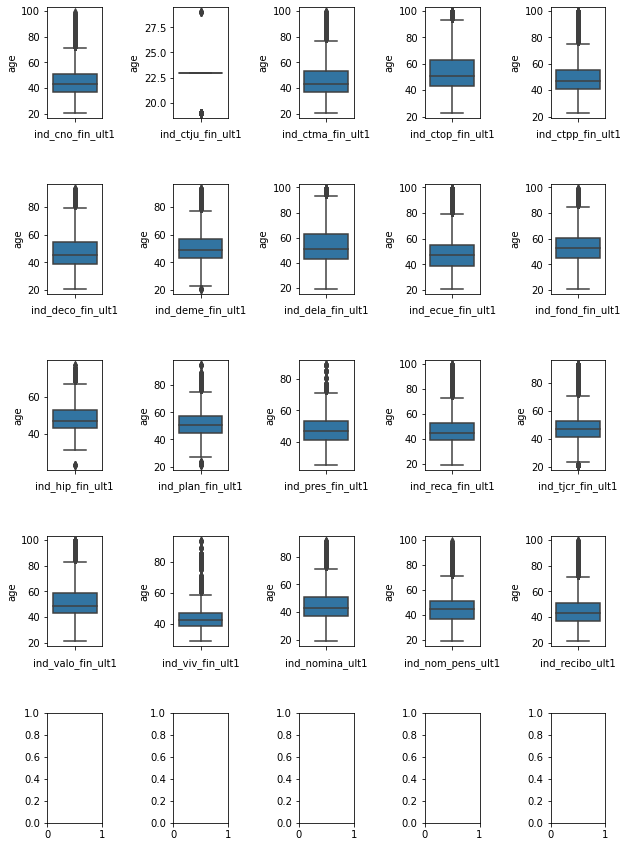

In [93]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10,15))
plt.subplots_adjust(wspace=1.3, hspace=0.6)
fig_row=0
for col_id in range(24, 44):
    ax_id=col_id-24
    fig_label=CustomerData.columns[col_id]
    feat=CustomerData.columns[col_id]
    fig_col=(col_id+1)%5
    box_plot=sns.boxplot(y='age', data=CustomerData[(CustomerData[feat]==1) & CustomerData.age], ax=axes[fig_row][fig_col])
    box_plot.set(xlabel=fig_label)
    if fig_col==4: fig_row+=1

### This implies data is numerically distinct

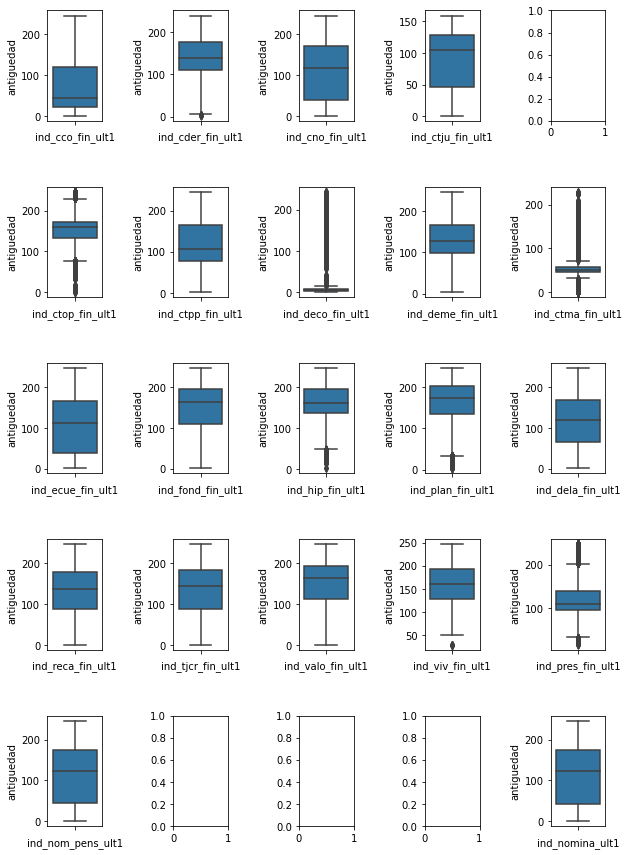

In [36]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10,15))
plt.subplots_adjust(wspace=1.3, hspace=0.6)
fig_row=0
for col_id in range(24, 45):
    ax_id=col_id-24
    fig_label=CustomerData.columns[col_id]
    feat=CustomerData.columns[col_id]
    fig_col=(col_id+1)%5
    box_plot=sns.boxplot(y='antiguedad', data=CustomerData[(CustomerData[feat]==1) & CustomerData.antiguedad], ax=axes[fig_row][fig_col])
    box_plot.set(xlabel=fig_label)
    if fig_col==3: fig_row+=1

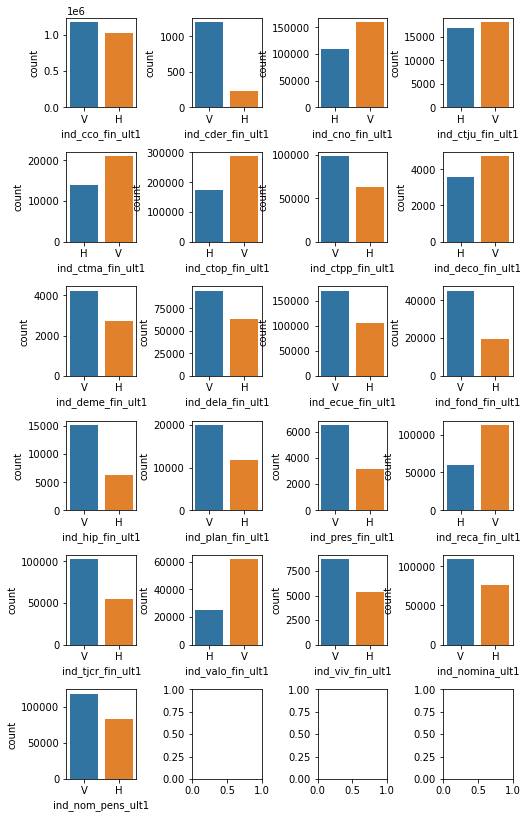

In [35]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(8,14))
plt.subplots_adjust(wspace=0.8, hspace=0.5)
# fig.tight_layout()
fig_row=0
for col_id in range(24, 45):
    ax_id=col_id-24
    fig_label= CustomerData.columns[col_id]
    feat=CustomerData.columns[col_id]
    fig_col=(col_id)%4
    countplot=sns.countplot(x='sexo', data=CustomerData[(CustomerData[feat]==1) & (CustomerData['sexo'].notna())],ax=axes[fig_row][fig_col])
    countplot.set(xlabel=fig_label)
    if fig_col==3: fig_row+=1

#### Targets distributed based on 'SEXO' are skewed towards right. 
